# ANN - Regression

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from mpl_toolkits.mplot3d import Axes3D

In [63]:
N = 2000

X = np.random.random((N,2))*6 - 3

Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

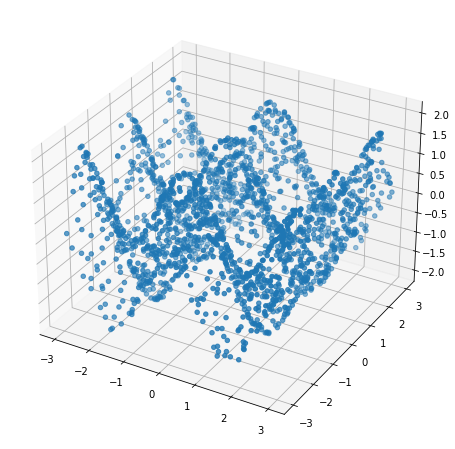

In [64]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1],Y)

In [65]:
model = nn.Sequential(

                        nn.Linear(2,128),
                        nn.ReLU(), # activation function
                        nn.Linear(128,1)
                    )


criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.001)


def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):

    train_losses = np.zeros(epochs)

    for it in range(epochs):

        optimizer.zero_grad()

        outputs = model(X_train)

        loss = criterion(outputs,y_train)

        loss.backward()

        optimizer.step()

        train_losses[it] = loss.item()

    return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1,1))

train_losses = full_gd(model, criterion, optimizer, X_train, y_train, epochs=1500)


Text(0.5, 1.0, 'Train Losses')

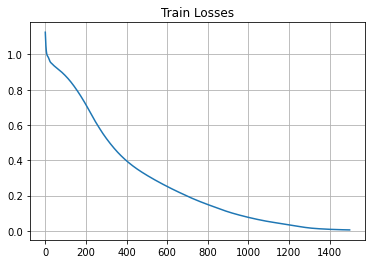

In [66]:
plt.plot(train_losses)
plt.grid()

plt.title('Train Losses')

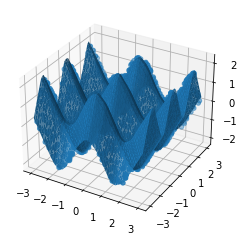

In [67]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1],Y)

with torch.no_grad():

    line = np.linspace(-3,3,50)
    xx, yy = np.meshgrid(line,line)
    xgrid = np.vstack((xx.flatten(),yy.flatten())).T
    xgrid_torch = torch.from_numpy(xgrid.astype(np.float32))
    yhat = model(xgrid_torch).numpy().flatten()
    ax.plot_trisurf(xgrid[:,0],xgrid[:,1],yhat, linewidth=0.2,antialiased=True)
    plt.show()